# Using Tensorflow and Keras to Classify Images of Fruit

In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os
from keras.preprocessing import image
import random
from keras import utils
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report


import keras
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D, ConvLSTM2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras import backend as K

import warnings
warnings.filterwarnings(action="ignore")

%matplotlib inline 

Using TensorFlow backend.


## Data Preprocessing

In [2]:

# Get the categories for each label

data_path = '/Users/Amechi/Documents/Python Files/fruits/fruits-360/Training'
CATEGORIES = []

file_list = os.listdir(data_path)
file_list.remove('.DS_Store')

for filename in file_list:
    CATEGORIES.append(filename)
print(CATEGORIES)       

['Cherry 1', 'Strawberry', 'Pomegranate', 'Guava', 'Apple Red 1', 'Mandarine', 'Raspberry', 'Banana Red', 'Grape White 4']


### Training Data

In [3]:
%%time

# Loading Training data

training_data=[]
n_categories=[]

def create_training_data():
    for category in CATEGORIES:
        folder_path = os.path.join(data_path, category).replace("\\","/")
        class_num = CATEGORIES.index(category)
        counter = 0
        for i in os.listdir(folder_path):
            try:
                img_path = os.path.join(folder_path, i).replace("\\","/")
                img = image.load_img(img_path, target_size=(224, 224))
                img = image.img_to_array(img)
                training_data.append([img, class_num])
                counter += 1
            except Exception as e:
                pass
        n_categories.append(counter)
create_training_data()

CPU times: user 3.35 s, sys: 1.19 s, total: 4.55 s
Wall time: 5.66 s


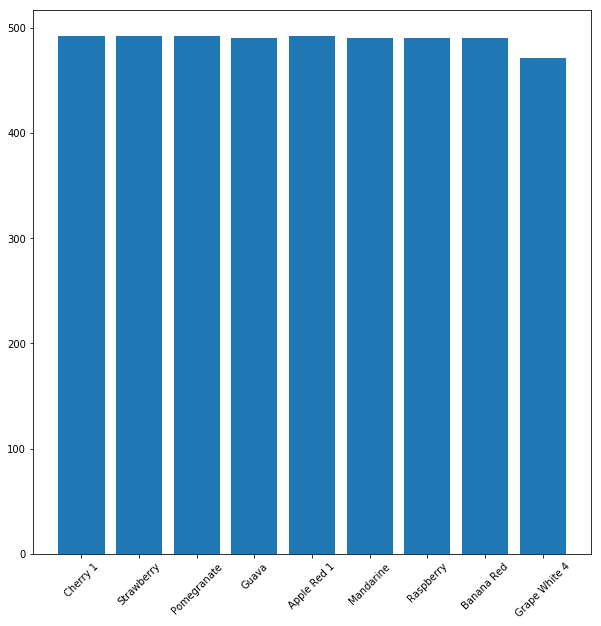

In [4]:
# Visualizing Fruit Frequencies of training data

plt.figure(figsize=(10,10))
plt.bar(CATEGORIES, n_categories)
plt.xticks(CATEGORIES, rotation=45)
plt.show()

In [5]:
%%time
# Preparing training data for CNN

random.shuffle(training_data)

X_train = []
Y_train = []
for img, class_num in training_data:
    X_train.append(img)
    Y_train.append(class_num)

X_train = np.array(X_train).reshape(-1, 224, 224, 3)
Y_train = np.array(Y_train)
X_train.shape

CPU times: user 935 ms, sys: 689 ms, total: 1.62 s
Wall time: 1.58 s


### Testing Data

In [6]:
# Loading Test data

testing_data = []
n_test_categories = []
test_path = '/Users/Amechi/Documents/Python Files/fruits/fruits-360/Test'
test_CATEGORIES = []

test_list = os.listdir(test_path)
test_list.remove('.DS_Store')

for filename in test_list:
    test_CATEGORIES.append(filename)      

def create_test_data():
    for category in test_CATEGORIES:
        folder_path = os.path.join(test_path, category).replace("\\","/")
        class_num = test_CATEGORIES.index(category)
        counter = 0
        for i in os.listdir(folder_path):
            try:
                img_path = os.path.join(folder_path, i).replace("\\","/")
                img = image.load_img(img_path, target_size=(224, 224))
                img = image.img_to_array(img)
                testing_data.append([img, class_num])
                counter += 1
            except Exception as e:
                pass
        n_test_categories.append(counter)
create_test_data()


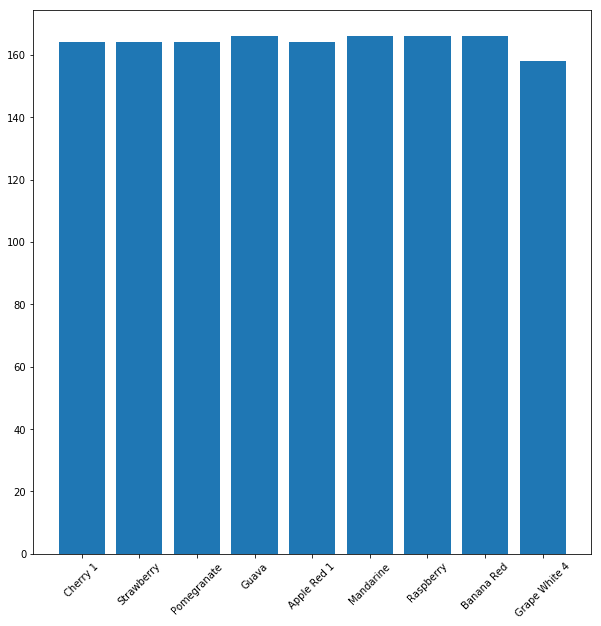

In [7]:
# Visualizing Fruit Frequencies of testing data

plt.figure(figsize=(10,10))
plt.bar(test_CATEGORIES, n_test_categories)
plt.xticks(test_CATEGORIES, rotation=45)
plt.show()

In [8]:
# Prepare test data

random.shuffle(testing_data)

X_test = []
Y_test = []
for img, class_num in testing_data:
    X_test.append(img)
    Y_test.append(class_num)

X_test = np.array(X_test).reshape(-1, 224, 224, 3)
X_test.shape

(1478, 224, 224, 3)

In [9]:
# Storing Outcome variables Without Dummies

Y_train_2,Y_test_2 = Y_train,Y_test

In [10]:
# Preparing Outcome Variables
Y_train = utils.to_categorical(Y_train, num_classes=len(n_categories))
Y_test = utils.to_categorical(Y_test, num_classes=len(n_test_categories))

# Normalizing Data
X_train_ = X_train/255
X_test_ = X_test/255


In [11]:
x_train,y_train = X_train_ , Y_train
x_val,y_val = X_test_ , Y_test
x_test,y_test = x_val,y_val

## Modeling the Data

### Control - 10 Epochs, Image Augmentation

In [12]:

## Building the Model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# optimization
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compiling the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=36

W0829 11:52:04.377018 4497253824 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 11:52:04.391973 4497253824 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 11:52:04.394870 4497253824 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 11:52:04.409895 4497253824 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0829 11:52:04.412197 4497253824 deprecation_wrapper.py:119] From /usr/loca

In [13]:
%%time

# Adding Variations of original photos to prevent overfiting

datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.5,    
                           zoom_range=0.5,        
                           width_shift_range=0.5, 
                           height_shift_range=0.5,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

W0829 11:52:12.012701 4497253824 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
122/122 [==============================] - 129s 1s/step - loss: 2.2236 - acc: 0.2935 - val_loss: 1.0875 - val_acc: 0.6211
Epoch 2/10
122/122 [==============================] - 149s 1s/step - loss: 0.9709 - acc: 0.6199 - val_loss: 0.4615 - val_acc: 0.8390
Epoch 3/10
122/122 [==============================] - 134s 1s/step - loss: 0.4461 - acc: 0.8253 - val_loss: 0.2564 - val_acc: 0.8877
Epoch 4/10
122/122 [==============================] - 129s 1s/step - loss: 0.4762 - acc: 0.8351 - val_loss: 0.4734 - val_acc: 0.8058
Epoch 5/10
122/122 [==============================] - 129s 1s/step - loss: 0.3555 - acc: 0.8718 - val_loss: 0.2035 - val_acc: 0.9263
Epoch 6/10
122/122 [==============================] - 128s 1s/step - loss: 0.2973 - acc: 0.8937 - val_loss: 0.1704 - val_acc: 0.9438
Epoch 7/10
122/122 [==============================] - 127s 1s/step - loss: 0.3393 - acc: 0.8871 - val_loss: 0.1334 - val_acc: 0.9540
Epoch 8/10
122/122 [==============================] - 128s 1s/step - 

In [14]:
## Model Evaluation

pred =  model.predict_classes(x_val)
print(classification_report(Y_test_2, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      0.60      0.75       164
           2       0.67      0.80      0.73       164
           3       1.00      1.00      1.00       166
           4       0.83      1.00      0.91       164
           5       1.00      1.00      1.00       166
           6       1.00      1.00      1.00       166
           7       1.00      1.00      1.00       166
           8       1.00      1.00      1.00       158

   micro avg       0.93      0.93      0.93      1478
   macro avg       0.94      0.93      0.93      1478
weighted avg       0.94      0.93      0.93      1478



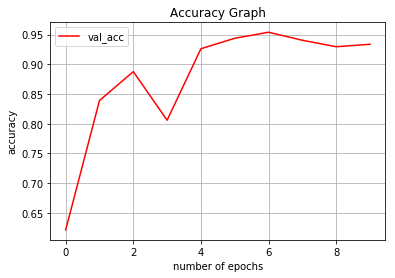

In [15]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

Accuracy generally increased as the number of epochs increased.

### 10 Epochs, Reduced Image Augmentation

In [16]:
## Building the Model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# optimization
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compiling the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=36

In [17]:
%%time

# Adding Variations of Original photos to prevent overfiting

datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.01,    
                           zoom_range=0.01,        
                           width_shift_range=0.01, 
                           height_shift_range=0.01,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

# model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/10
122/122 [==============================] - 107s 877ms/step - loss: 0.7313 - acc: 0.7803 - val_loss: 0.1112 - val_acc: 0.9553
Epoch 2/10
122/122 [==============================] - 113s 925ms/step - loss: 0.0374 - acc: 0.9882 - val_loss: 0.0767 - val_acc: 0.9716
Epoch 3/10
122/122 [==============================] - 113s 925ms/step - loss: 0.0222 - acc: 0.9927 - val_loss: 0.0291 - val_acc: 0.9926
Epoch 4/10
122/122 [==============================] - 113s 930ms/step - loss: 0.0326 - acc: 0.9909 - val_loss: 0.1567 - val_acc: 0.9547
Epoch 5/10
122/122 [==============================] - 116s 949ms/step - loss: 0.0138 - acc: 0.9957 - val_loss: 0.0150 - val_acc: 1.0000
Epoch 6/10
122/122 [==============================] - 136s 1s/step - loss: 0.0047 - acc: 0.9991 - val_loss: 0.0358 - val_acc: 0.9831
Epoch 7/10
122/122 [==============================] - 119s 979ms/step - loss: 0.0094 - acc: 0.9966 - val_loss: 0.0631 - val_acc: 0.9723
Epoch 8/10
122/122 [==============================]

In [18]:
# Model Evaluation

pred =  model.predict_classes(x_val)
print(classification_report(Y_test_2, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       164
           3       1.00      1.00      1.00       166
           4       1.00      1.00      1.00       164
           5       1.00      1.00      1.00       166
           6       1.00      1.00      1.00       166
           7       1.00      1.00      1.00       166
           8       1.00      1.00      1.00       158

   micro avg       1.00      1.00      1.00      1478
   macro avg       1.00      1.00      1.00      1478
weighted avg       1.00      1.00      1.00      1478



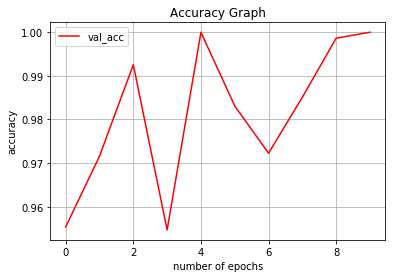

In [19]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

Reducing the image augmentation actually resulted in higher accuracy scores. The increased risk of overfitting may become more evident with larger datasets. However, this model is the most preferable for classifying the fruit because of the extremely high accuracy.

### 10 Epochs, Image Augmentation, Increased Batch Size

In [20]:
## Building the Model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# optimization
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compiling the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=36

In [21]:
%%time

# Adding Variations of Original photos to prevent overfiting

datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.5,    
                           zoom_range=0.5,        
                           width_shift_range=0.5, 
                           height_shift_range=0.5,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

# model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/10
122/122 [==============================] - 115s 940ms/step - loss: 2.1450 - acc: 0.2618 - val_loss: 1.1303 - val_acc: 0.5101
Epoch 2/10
122/122 [==============================] - 147s 1s/step - loss: 0.9832 - acc: 0.6224 - val_loss: 0.7869 - val_acc: 0.6705
Epoch 3/10
122/122 [==============================] - 132s 1s/step - loss: 0.6027 - acc: 0.7843 - val_loss: 0.3944 - val_acc: 0.8714
Epoch 4/10
122/122 [==============================] - 116s 954ms/step - loss: 0.3861 - acc: 0.8606 - val_loss: 0.2010 - val_acc: 0.9215
Epoch 5/10
122/122 [==============================] - 152s 1s/step - loss: 0.2910 - acc: 0.8923 - val_loss: 0.2243 - val_acc: 0.9486
Epoch 6/10
122/122 [==============================] - 135s 1s/step - loss: 0.2538 - acc: 0.9105 - val_loss: 0.1574 - val_acc: 0.9675
Epoch 7/10
122/122 [==============================] - 135s 1s/step - loss: 0.2128 - acc: 0.9218 - val_loss: 0.1761 - val_acc: 0.9093
Epoch 8/10
122/122 [==============================] - 118s 967m

In [22]:
pred =  model.predict_classes(x_val)
print(classification_report(Y_test_2, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      0.68      0.81       164
           2       0.70      0.74      0.72       164
           3       1.00      1.00      1.00       166
           4       0.80      1.00      0.89       164
           5       1.00      1.00      1.00       166
           6       1.00      1.00      1.00       166
           7       1.00      1.00      1.00       166
           8       1.00      1.00      1.00       158

   micro avg       0.94      0.94      0.94      1478
   macro avg       0.94      0.94      0.93      1478
weighted avg       0.94      0.94      0.93      1478



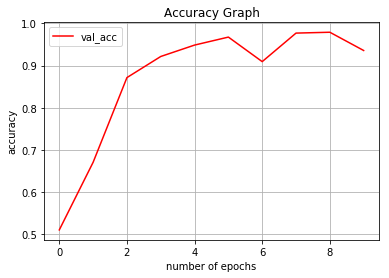

In [23]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

Increasing the batch size significantly reduced runtime and computational complexity. There was a significant drop in accuracy, however.

### 10 Epochs With RNN Only

In [37]:
## Building the Model

model = Sequential()
model.add(LSTM(72, input_shape=(1,224*224*3)))
model.add(Dense(9, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# model fitting

history = model.fit(x_train.reshape(4399,1,224*224*3), y_train, validation_data=(x_val.reshape(1478,1,224*224*3),y_val), epochs=15, batch_size=500)

Train on 4399 samples, validate on 1478 samples
Epoch 1/15
4399/4399 [==============================] - 30s 7ms/step - loss: 2.2801 - acc: 0.1109 - val_loss: 2.2417 - val_acc: 0.1123
Epoch 2/15
4399/4399 [==============================] - 24s 5ms/step - loss: 2.1962 - acc: 0.1216 - val_loss: 2.1618 - val_acc: 0.2206
Epoch 3/15
4399/4399 [==============================] - 24s 6ms/step - loss: 2.1426 - acc: 0.2232 - val_loss: 2.1488 - val_acc: 0.2233
Epoch 4/15
4399/4399 [==============================] - 24s 6ms/step - loss: 2.1016 - acc: 0.2269 - val_loss: 2.0810 - val_acc: 0.2544
Epoch 5/15
4399/4399 [==============================] - 28s 6ms/step - loss: 2.0611 - acc: 0.3183 - val_loss: 2.0565 - val_acc: 0.3302
Epoch 6/15
4399/4399 [==============================] - 22s 5ms/step - loss: 2.0272 - acc: 0.3064 - val_loss: 2.0194 - val_acc: 0.2233
Epoch 7/15
4399/4399 [==============================] - 35s 8ms/step - loss: 1.9859 - acc: 0.3312 - val_loss: 1.9729 - val_acc: 0.3978
Epoch 8

In [39]:
score = model.evaluate(x_val.reshape(1478,1,224*224*3), y_val, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

1478/1478 [==============================] - 3s 2ms/step
Test loss: 1.801454110300428
Test accuracy: 0.7489851149396419


In [40]:
pred =  model.predict_classes(x_val.reshape(1478,1,224*224*3))
print(classification_report(Y_test_2, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       0.00      0.00      0.00       164
           2       0.94      0.94      0.94       164
           3       1.00      1.00      1.00       166
           4       0.00      0.00      0.00       164
           5       0.50      1.00      0.67       166
           6       0.50      1.00      0.67       166
           7       0.82      0.80      0.81       166
           8       1.00      1.00      1.00       158

   micro avg       0.75      0.75      0.75      1478
   macro avg       0.64      0.75      0.68      1478
weighted avg       0.64      0.75      0.68      1478



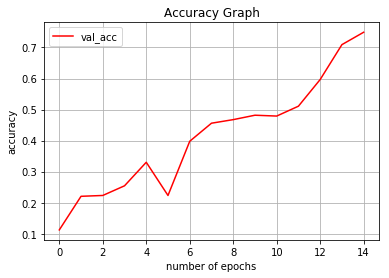

In [41]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

### 10 Epochs with CNN + RNN and No Image Augmentation

In [58]:
# Building The Model

cnn=Sequential()
cnn.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Flatten())

model = Sequential()
model.add(TimeDistributed(cnn))
model.add(LSTM(72, input_shape=(1,224*224*3)))
model.add(Dense(9,activation="softmax"))

model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [59]:
%%time

# Model Fitting

history = model.fit(x_train.reshape(4399,1,224,224,3), y_train, validation_data=(x_val.reshape(1478,1,224,224,3),y_val), epochs=10, batch_size=128)

Train on 4399 samples, validate on 1478 samples
Epoch 1/10
4399/4399 [==============================] - 94s 21ms/step - loss: 2.1461 - acc: 0.2537 - val_loss: 1.9514 - val_acc: 0.3701
Epoch 2/10
4399/4399 [==============================] - 96s 22ms/step - loss: 1.7933 - acc: 0.3876 - val_loss: 1.7949 - val_acc: 0.4195
Epoch 3/10
4399/4399 [==============================] - 107s 24ms/step - loss: 1.6931 - acc: 0.4094 - val_loss: 1.6673 - val_acc: 0.4344
Epoch 4/10
4399/4399 [==============================] - 99s 23ms/step - loss: 1.5532 - acc: 0.4501 - val_loss: 1.6234 - val_acc: 0.4283
Epoch 5/10
4399/4399 [==============================] - 108s 25ms/step - loss: 1.4564 - acc: 0.5140 - val_loss: 1.5622 - val_acc: 0.4398
Epoch 6/10
4399/4399 [==============================] - 115s 26ms/step - loss: 1.3877 - acc: 0.5044 - val_loss: 1.4191 - val_acc: 0.4452
Epoch 7/10
4399/4399 [==============================] - 124s 28ms/step - loss: 1.3069 - acc: 0.5858 - val_loss: 1.3329 - val_acc: 0.5

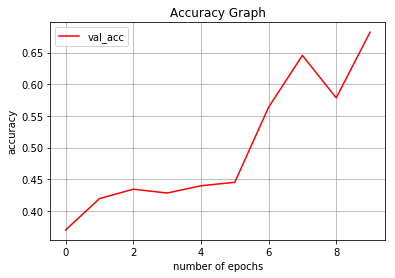

In [60]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

In [62]:

score = model.evaluate(x_val.reshape(1478,1,224,224,3), y_val, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

1478/1478 [==============================] - 5s 4ms/step
Test loss: 1.2508743965899993
Test accuracy: 0.6820027064406017


In [61]:
# Model Evaluation

pred =  model.predict_classes(x_val.reshape(1478,1,224,224,3))
print(classification_report(Y_test_2, pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       164
           1       0.73      0.73      0.73       164
           2       0.00      0.00      0.00       164
           3       0.57      0.49      0.53       166
           4       0.40      0.79      0.53       164
           5       0.80      0.87      0.83       166
           6       0.64      1.00      0.78       166
           7       0.62      0.44      0.52       166
           8       1.00      1.00      1.00       158

   micro avg       0.68      0.68      0.68      1478
   macro avg       0.64      0.68      0.65      1478
weighted avg       0.64      0.68      0.65      1478

